## Explicação Detalhada do Script: ##
1.**Geração de Dados Simulados**(*simulate_drying_data*):  
    a. Cria um DataFrame com Tempo (h) e Umidade (g/g b.s.).  
    b. A umidade é simulada usando uma função exponencial A * exp(-k * t),  
    que é um modelo comum para a taxa de secagem.  
    c. É adicionado um ruído aleatório para tornar os dados mais realistas,  
    simulando as variações que você encontraria em um experimento real.  
    d. Os dados são salvos em um arquivo CSV, que será usado no restante do script.      
2. **Importação de Dados:**
Usa *pd.read_csv()* para carregar os dados simulados.  
Inclui um tratamento de erro básico caso o arquivo não seja encontrado

Vamos criar um script Python completo para simular os dados,  
importá-los, limpá-los, analisá-los,  
visualizá-los e ajustar um modelo.

In [5]:
# Simulando dados

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# 1. Geração de Dados Simulados de Secagem
def simulate_drying_data(time_points, initial_moisture, drying_rate, noise_level=0.05):
    """
    Simula dados de secagem baseados em um modelo exponencial.

    Args:
        time_points (np.array): Pontos de tempo em que a leitura é realizada.
        initial_moisture (float): Umidade inicial da amostra (base seca).
        drying_rate (float): Taxa de secagem (constante).
        noise_level (float): Nível de ruído aleatório a ser adicionado aos dados.

    Returns:
        pd.DataFrame: DataFrame com as colunas 'Tempo (h)' e 'Umidade (g/g b.s.)'.
    """
    moisture = initial_moisture * np.exp(-drying_rate * time_points)
    # Adicionar ruído para simular dados experimentais
    moisture_noisy = moisture * (1 + noise_level * np.random.randn(len(time_points)))
    # Garantir que a umidade não seja negativa
    moisture_noisy[moisture_noisy < 0] = 0.01
    return pd.DataFrame({'Tempo (h)': time_points, 'Umidade (g/g b.s.)': moisture_noisy})

# Parâmetros de simulação
time = np.arange(0, 24.5, 0.5) # Tempo em horas, a cada 30 minutos
initial_moisture_sim = 2.5 # g de água / g de matéria seca
drying_rate_sim = 0.15 # /hora

# Gerar dados
drying_df = simulate_drying_data(time, initial_moisture_sim, drying_rate_sim)

# Salvar em CSV
file_name = 'dados_secagem_simulados.csv'
drying_df.to_csv(file_name, index=False)

print(f"Dados simulados de secagem criados e salvos como '{file_name}'.")
print("\nPrimeiras linhas dos dados simulados:")
print(drying_df.head())

Dados simulados de secagem criados e salvos como 'dados_secagem_simulados.csv'.

Primeiras linhas dos dados simulados:
   Tempo (h)  Umidade (g/g b.s.)
0        0.0            2.569995
1        0.5            2.240492
2        1.0            2.214497
3        1.5            2.236180
4        2.0            1.850346



Dados importados com sucesso de 'dados_secagem_simulados.csv'.

Verificando informações do DataFrame antes da limpeza:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Tempo (h)           49 non-null     float64
 1   Umidade (g/g b.s.)  49 non-null     float64
dtypes: float64(2)
memory usage: 916.0 bytes

Contagem de valores nulos por coluna:
Tempo (h)             0
Umidade (g/g b.s.)    0
dtype: int64

Dados após limpeza: 1 outliers removidos (se houver).

Informações do DataFrame após limpeza:
<class 'pandas.core.frame.DataFrame'>
Index: 48 entries, 1 to 48
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Tempo (h)           48 non-null     float64
 1   Umidade (g/g b.s.)  48 non-null     float64
dtypes: float64(2)
memory usage: 1.1 KB

Estatíst

C:\Users\Pichau\AppData\Local\Temp\ipykernel_15192\2696467156.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Taxa de Umidade'] = -df_cleaned['Umidade (g/g b.s.)'].diff() / df_cleaned['Tempo (h)'].diff()


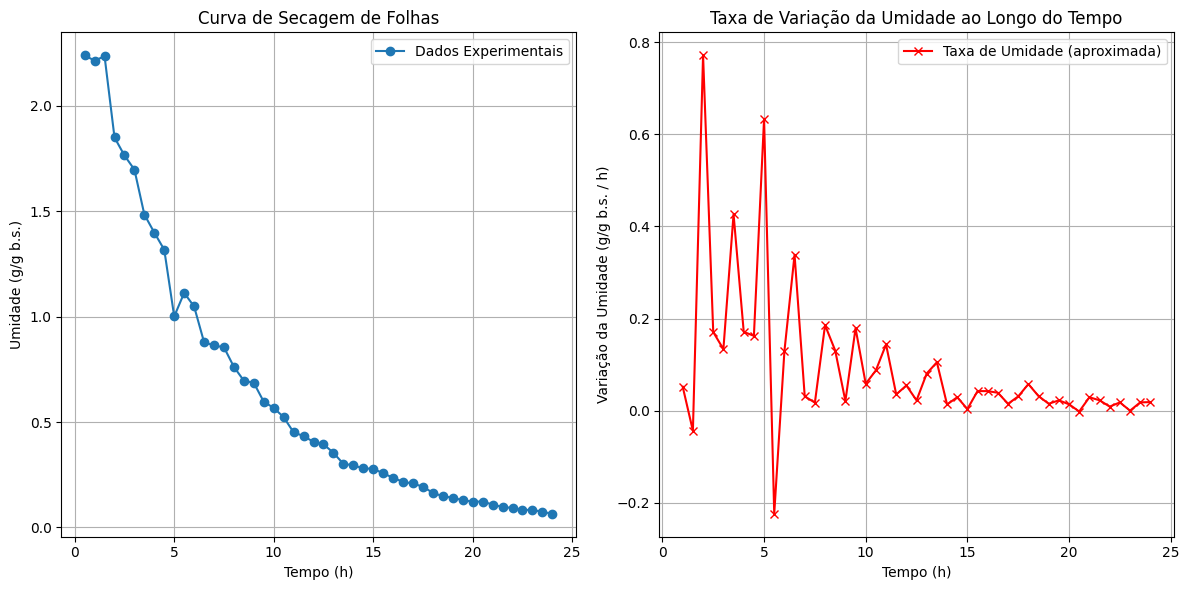

In [6]:
# script principal para importação, limpeza, análise, visualização e ajuste de modelo

# 2. Importar os dados no formato .csv
try:
    df = pd.read_csv(file_name)
    print(f"\nDados importados com sucesso de '{file_name}'.")
except FileNotFoundError:
    print(f"Erro: O arquivo '{file_name}' não foi encontrado. Certifique-se de que o script de simulação foi executado.")
    exit()

# 3. Limpeza de Dados
print("\nVerificando informações do DataFrame antes da limpeza:")
df.info()

# Verificar valores nulos
print("\nContagem de valores nulos por coluna:")
print(df.isnull().sum())

# Se houver valores nulos, podemos optar por removê-los ou preenchê-los.
# Para dados de secagem, remover linhas com nulos pode ser razoável se forem poucos.
# df.dropna(inplace=True)

# Verificar tipos de dados e converter se necessário
# Neste caso, como geramos os dados, eles devem estar corretos.
# df['Tempo (h)'] = pd.to_numeric(df['Tempo (h)'], errors='coerce')
# df['Umidade (g/g b.s.)'] = pd.to_numeric(df['Umidade (g/g b.s.)'], errors='coerce')

# Remover linhas onde a conversão falhou (se 'coerce' for usado)
# df.dropna(inplace=True)

# Remover outliers (exemplo básico usando IQR, pode ser adaptado)
Q1 = df['Umidade (g/g b.s.)'].quantile(0.25)
Q3 = df['Umidade (g/g b.s.)'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_cleaned = df[(df['Umidade (g/g b.s.)'] >= lower_bound) & (df['Umidade (g/g b.s.)'] <= upper_bound)]

print(f"\nDados após limpeza: {len(df) - len(df_cleaned)} outliers removidos (se houver).")
print("\nInformações do DataFrame após limpeza:")
df_cleaned.info()

# 4. Análise Exploratória de Dados (EDA)
print("\nEstatísticas descritivas da umidade:")
print(df_cleaned['Umidade (g/g b.s.)'].describe())

# Calculando a taxa de secagem média entre pontos (exemplo)
df_cleaned['Taxa de Umidade'] = -df_cleaned['Umidade (g/g b.s.)'].diff() / df_cleaned['Tempo (h)'].diff()
print("\nEstatísticas descritivas da taxa de umidade (diferença):")
print(df_cleaned['Taxa de Umidade'].describe())

# 5. Visualização dos Dados
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(df_cleaned['Tempo (h)'], df_cleaned['Umidade (g/g b.s.)'], 'o-', label='Dados Experimentais')
plt.xlabel('Tempo (h)')
plt.ylabel('Umidade (g/g b.s.)')
plt.title('Curva de Secagem de Folhas')
plt.grid(True)
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(df_cleaned['Tempo (h)'], df_cleaned['Taxa de Umidade'], 'x-', color='red', label='Taxa de Umidade (aproximada)')
plt.xlabel('Tempo (h)')
plt.ylabel('Variação da Umidade (g/g b.s. / h)')
plt.title('Taxa de Variação da Umidade ao Longo do Tempo')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

Finalmente, vamos ajustar um modelo de secagem usando *scipy.optimize.curve_fit.*  
Um modelo comum para secagem é o exponencial (Newton),  
que assume uma diminuição exponencial da umidade ao longo do tempo.


Parâmetros do modelo de Newton ajustados:
  Umidade inicial (A): 2.5624 g/g b.s.
  Constante de secagem (k): 0.1526 1/h


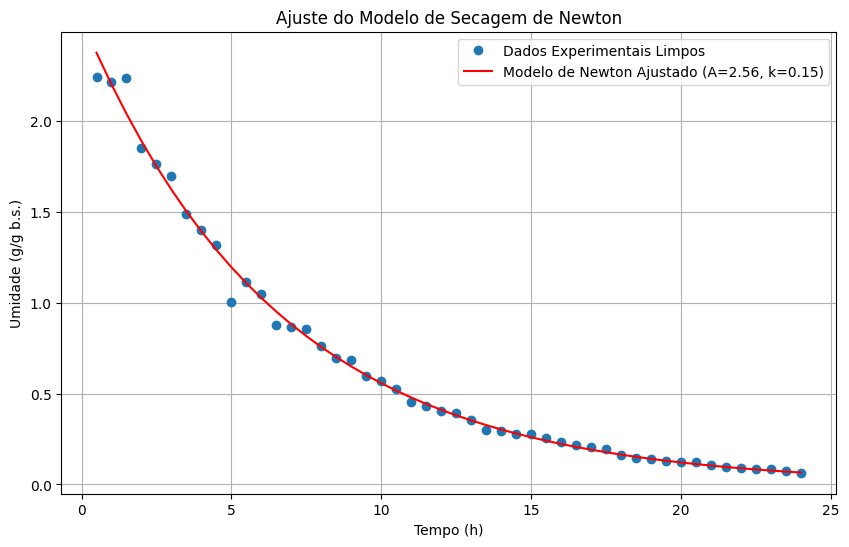

R-quadrado do ajuste: 0.9940


In [7]:
# 6. Ajuste de Modelo com SciPy
# Modelo de Newton para secagem: M = A * exp(-k * t)
def newton_model(t, A, k):
    """
    Função do modelo de Newton para secagem.
    M = Umidade (g/g b.s.)
    t = Tempo (h)
    A = Umidade inicial (g/g b.s.)
    k = Constante de secagem (1/h)
    """
    return A * np.exp(-k * t)

# Dados para o ajuste
x_data = df_cleaned['Tempo (h)'].values
y_data = df_cleaned['Umidade (g/g b.s.)'].values

# Valores iniciais para os parâmetros (importante para curve_fit)
# Estimamos A como a umidade inicial e k como uma taxa de decaimento.
initial_guess = [y_data[0], 0.1] # [A, k]

try:
    # Realizar o ajuste da curva
    params, covariance = curve_fit(newton_model, x_data, y_data, p0=initial_guess)

    # Parâmetros ajustados
    A_fit, k_fit = params

    print(f"\nParâmetros do modelo de Newton ajustados:")
    print(f"  Umidade inicial (A): {A_fit:.4f} g/g b.s.")
    print(f"  Constante de secagem (k): {k_fit:.4f} 1/h")

    # Gerar pontos do modelo ajustado para visualização
    y_fitted = newton_model(x_data, A_fit, k_fit)

    # Visualização dos dados e do modelo ajustado
    plt.figure(figsize=(10, 6))
    plt.plot(x_data, y_data, 'o', label='Dados Experimentais Limpos')
    plt.plot(x_data, y_fitted, '-', color='red', label=f'Modelo de Newton Ajustado (A={A_fit:.2f}, k={k_fit:.2f})')
    plt.xlabel('Tempo (h)')
    plt.ylabel('Umidade (g/g b.s.)')
    plt.title('Ajuste do Modelo de Secagem de Newton')
    plt.grid(True)
    plt.legend()
    plt.show()

    # Cálculo do R-quadrado (para avaliar a qualidade do ajuste)
    ss_total = np.sum((y_data - np.mean(y_data)) ** 2)
    ss_residual = np.sum((y_data - y_fitted) ** 2)
    r_squared = 1 - (ss_residual / ss_total)
    print(f"R-quadrado do ajuste: {r_squared:.4f}")

except RuntimeError as e:
    print(f"\nErro ao ajustar o modelo: {e}")
    print("Pode ser necessário ajustar os valores iniciais (p0) ou verificar a qualidade dos dados.")